In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
combined = pd.read_csv('data/combined_go_emotions.csv')
artemis = pd.read_csv('data/old_full_go_emotions.csv')
full_combined = pd.read_csv('data/full_combined_go_emotions.csv')

In [3]:
combined.columns

Index(['emotion', 'utterance', 'art_style', 'painting', 'repetition',
       'version', 'split', 'tokens', 'tokens_len', 'utterance_spelled',
       'tokens_encoded', 'emotion_label', 'image_file', 'grounding_emotion',
       'go_emotions'],
      dtype='object')

In [4]:
def softmax(s):
    s = np.array(eval(s))
    e_x = np.exp(s - np.max(s))
    return e_x / e_x.sum()

In [5]:
combined['go_emotions'] = combined['go_emotions'].apply(softmax)

In [6]:
artemis['go_emotions'] = artemis['go_emotions'].apply(softmax)

In [7]:
combined_hist = combined['go_emotions'].mean(axis=0)

In [8]:
artemis_hist = artemis['go_emotions'].mean(axis=0)

In [9]:
ARTEMIS_EMOTIONS = ['admiration','amusement','anger','annoyance','approval','caring',
     'confusion','curiosity','desire','disappointment','disapproval',
     'disgust','embarrassment','excitement','fear','gratitude',
     'grief','joy','love','nervousness','optimism','pride',
     'realization','relief','remorse','sadness','surprise','neutral']
# ARTEMIS_EMOTIONS = ['amusement', 'awe', 'contentment', 'excitement',
#                     'anger', 'disgust',  'fear', 'sadness']
EMOTION_TO_IDX = {e: i for i, e in enumerate(ARTEMIS_EMOTIONS)}
IDX_TO_EMOTION = {EMOTION_TO_IDX[e]: e for e in EMOTION_TO_IDX}
# POS_NEG_ELSE = {'amusement': 0, 'awe': 0, 'contentment': 0, 'excitement': 0,
#                 'anger': 1, 'disgust': 1,  'fear': 1, 'sadness': 1,
#                 'something else': 2}

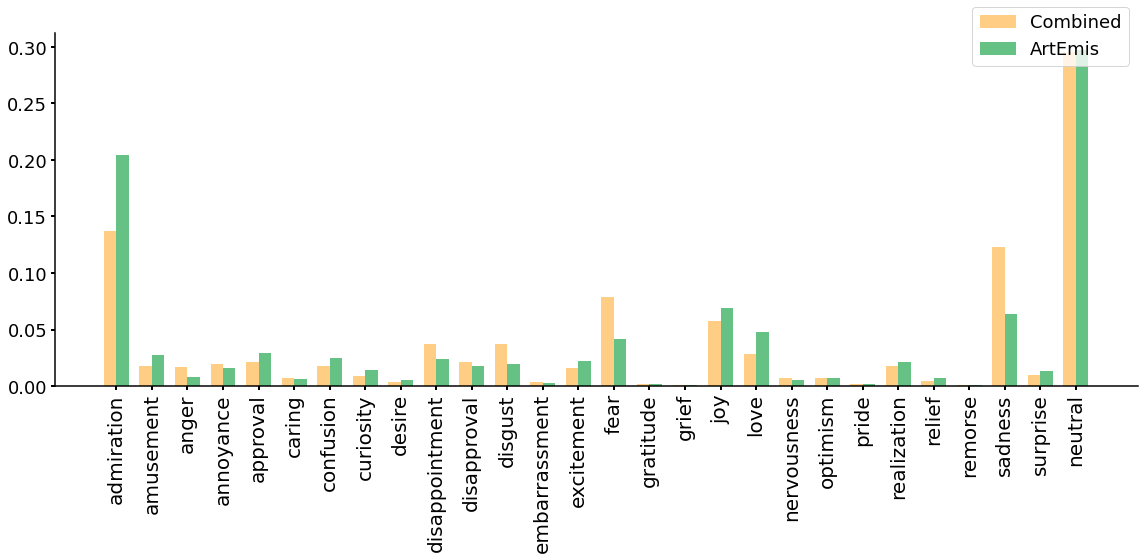

In [23]:
x = np.arange(len(ARTEMIS_EMOTIONS))  # the label locations
# width = 0.2  # the width of the bars
# train_sets = ['combined_emo', 'old_large_emo', 'new_emo']
# easy_names = ['Combined', 'ArtEmis', 'Contrastive']
# colors = ['#009933', '#ffad33', '#b300b3']
width = 0.35  # the width of the bars
easy_names = ['Combined', 'ArtEmis']
colors = ['#ffad33', '#009933'] 
fig, ax = plt.subplots(figsize=(16,8))
rects1 = ax.bar(x - width + (0+0.5)*width , combined_hist, width, label=easy_names[0],
                   color=colors[0], alpha=0.6)
rects2 = ax.bar(x - width + (1+0.5)*width , artemis_hist, width, label=easy_names[1],
                   color=colors[1], alpha=0.6)
# ax.set_ylabel(target_metric, fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(ARTEMIS_EMOTIONS, fontsize=20, rotation=90)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.legend(fontsize=18, loc=1, bbox_to_anchor=(1,1.1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
[ax.spines[i].set_linewidth(1.5) for i in ax.spines.keys()]
ax.tick_params(axis='both', which='both', width=2, length=4)

fig.tight_layout()

# plt.show()

In [25]:
fig.savefig('go_hist.svg')

In [34]:
entropy_combined = - np.sum(combined_hist*np.log(combined_hist)/np.log(28))
entropy_artemis = - np.sum(artemis_hist*np.log(artemis_hist)/np.log(28))

In [10]:
combined_arr = np.array(combined['go_emotions'].to_list())

In [11]:
artemis_arr = np.array(artemis['go_emotions'].to_list())

In [12]:
combined_c = np.corrcoef(combined_arr.T)

In [13]:
artemis_c = np.corrcoef(artemis_arr.T)

In [18]:
import seaborn

Text(0.5, 1.0, 'Combined')

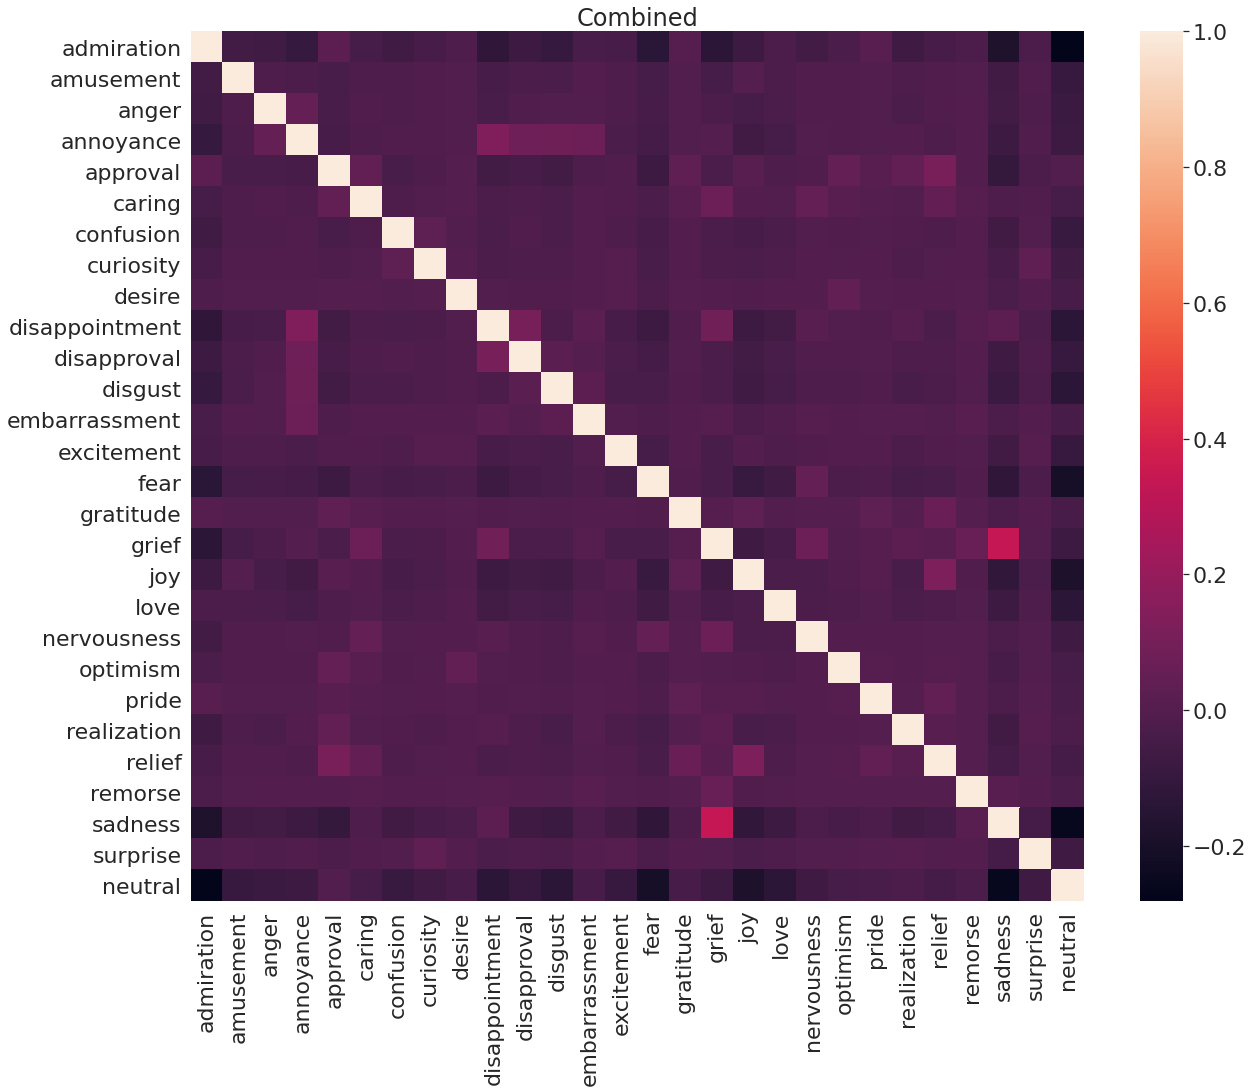

In [72]:
plt.figure(figsize=(20,16))
seaborn.set(font_scale = 2)
pp = seaborn.heatmap(combined_c, xticklabels=ARTEMIS_EMOTIONS, yticklabels=ARTEMIS_EMOTIONS)
plt.title('Combined')

In [73]:
fig = pp.get_figure()
fig.savefig('combined_hist.svg') 

Text(0.5, 1.0, 'ArtEmis')

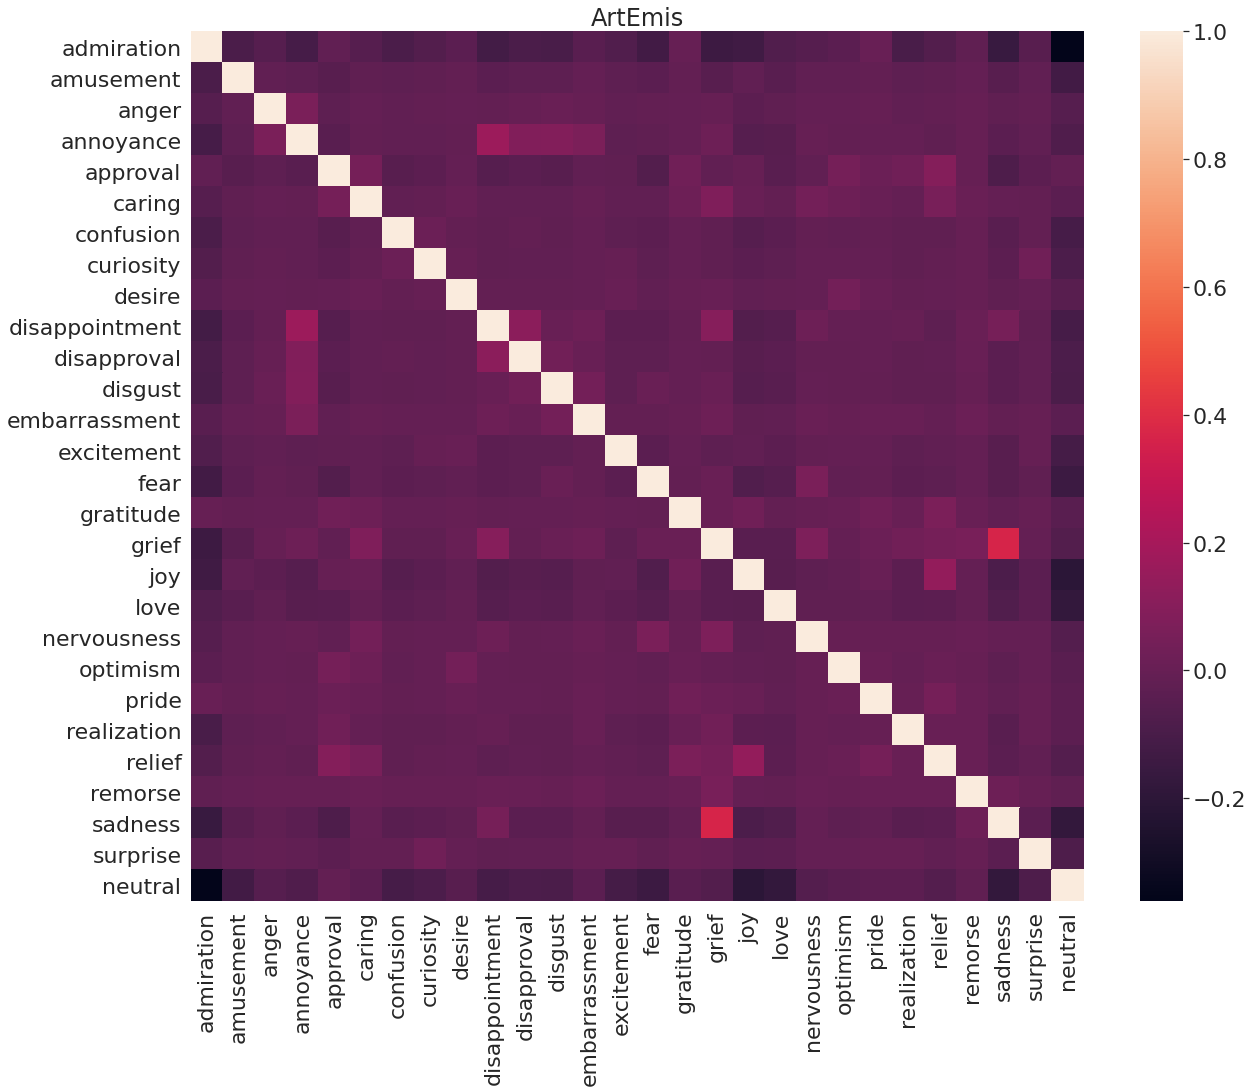

In [75]:
plt.figure(figsize=(20,16))
seaborn.set(font_scale = 2)
pp = seaborn.heatmap(artemis_c, xticklabels=ARTEMIS_EMOTIONS, yticklabels=ARTEMIS_EMOTIONS)
plt.title('ArtEmis')

In [76]:
fig = pp.get_figure()
fig.savefig('artemis_hist.svg') 